# Neuraal netwerk oefening: Nintendo games

In deze opgave gaan we een aantal eenvoudige neurale netwerken maken om de basisfunctionaliteit in te oefenen van Torch en Keras. Hierbij focussen we vooral op de processing stappen, het opstellen van de netwerkarchitectuur en de trainingsstap.
Het is hierbij niet noodzakelijk om op zoek te gaan naar de beste architectuur.

**Dien de opgave in door het te pushen naar de main branch op github en vergeet niet op de vragen te beantwoorden. Laat je output staan om eenvoudiger je resultaten te kunnen verifieren. Vergeet ook de vragen niet te beantwoorden**

## Downloaden en inladen data

Schrijf in onderstaande cell alle uit te voeren imports die nodig zijn doorheen deze notebook.

In [82]:
# Schrijf alle imports in deze blok
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import torch

In deze opgave maken we gebruik van een dataset over Nintendo games.
We gaan deze dataset gebruiken om de gebrukersscore te voorspellen die een bepaald spel gaat behalen.

Maak gebruik van de tensorflow get_file om de volgende file te downloaden:
* https://www.kaggle.com/datasets/joebeachcapital/nintendo-games

Dit is een dataset van kaggle dus gebruik de opendatasets library zoals gezien in data science

In [83]:
# downloaden datasets
od.download('https://www.kaggle.com/datasets/joebeachcapital/nintendo-games')

Skipping, found downloaded files in "./nintendo-games" (use force=True to force download)


Lees deze datasets in (met behulp van panda) en als dataframe.
Print de eerste 5 rijen uit.

**Welke kolommen zijn in deze dataset de features en welke de targets/labels? Welke kolommen zou je niet gebruiken en waarom?**
Maak lijsten aan voor de namen van de feature-kolommen en label kolom.

Antwoord: ...

In [84]:
df = pd.read_csv("./nintendo-games/NintendoGames.csv")
display(df.head())

label = ['user_score']
features = ['platform', 'meta_score', 'esrb_rating', 'developers', 'genres']

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario RPG,Switch,"Nov 17, 2023",NaN,/game/switch/super-mario-rpg,E,['Nintendo'],"['Role-Playing', 'Japanese-Style']"
1,NaN,WarioWare: Move It!,Switch,"Nov 3, 2023",NaN,/game/switch/warioware-move-it!,RP,['Intelligent Systems'],"['Miscellaneous', 'Party / Minigame']"
2,NaN,Super Mario Bros. Wonder,Switch,"Oct 20, 2023",NaN,/game/switch/super-mario-bros-wonder,E,['Nintendo'],"['Action', 'Platformer', '2D']"
3,NaN,Detective Pikachu Returns,Switch,"Oct 6, 2023",NaN,/game/switch/detective-pikachu-returns,NaN,['Creatures Inc.'],"['Adventure', '3D', 'Third-Person']"
4,NaN,Fae Farm,Switch,"Sep 8, 2023",NaN,/game/switch/fae-farm,E10+,['Phoenix Labs'],"['Simulation', 'Virtual', 'Virtual Life']"


## Exploratory Data Analysis

Bereken voor de dataset de volgende statistieken met behulp van pandas:
* Hoeveel platformen zijn er aanwezig in de dataset
* Hoeveel games hebben geen user-score? Drop deze rijen ook.
* Maak een figuur om te tonen hoeveel games er ontwikkeld zijn voor elk platform.
* Hoeveel null waarden zijn er per kolom? Vul de numerieke kolommen aan met 0 en de categorieke kolommen met 'unknown'.
* Is de genres en developer kolom een string of een lijst? Zijn ze beide hetzelfde type? Hoe heb je dit gecontroleerd? Pas de kolommen met de apply-functie aan zodat beide kolommen een tekstveld zijn gesplitst door het ',' symbool.
* Hoeveel unieke developers zijn er die nintendo games maken? Wat zijn de 5 developers die aan het meeste games gewerkt hebben? Maak hiervoor een figuur.


**Antwoord vraag 5:**

In [4]:
# Vraag 1
df.platform.nunique()

10

In [5]:
# Vraag 2
print(df.user_score.isna().sum())
print(len(df))
df = df[~df.user_score.isna()]
print(len(df))

238
1094
856


<Axes: xlabel='platform'>

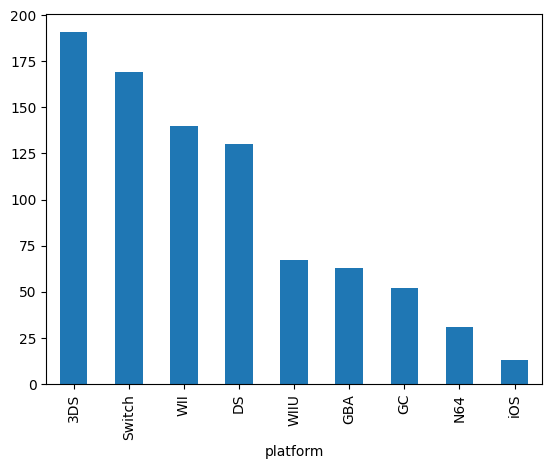

In [6]:
# Vraag 3
df.platform.value_counts().plot.bar()

In [7]:
# Vraag 4
display(df.isna().sum())
df.meta_score.fillna(0, inplace=True)
df.esrb_rating.fillna('unknown', inplace=True)

display(df.isna().sum())

meta_score     166
title            0
platform         0
date             0
user_score       0
link             0
esrb_rating     63
developers       0
genres           0
dtype: int64

/tmp/ipykernel_31/3919038669.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.meta_score.fillna(0, inplace=True)
/tmp/ipykernel_31/3919038669.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

meta_score     0
title          0
platform       0
date           0
user_score     0
link           0
esrb_rating    0
developers     0
genres         0
dtype: int64

In [8]:
# Vraag 5
df.developers = df.developers.apply(lambda x: x[1:-1].replace("'", '').replace("  ", ""))
df.genres = df.genres.apply(lambda x: x[1:-1].replace("'", '').replace(", ", ","))

In [9]:
# Vraag 6
df.developers.str.split(',').explode().value_counts()


developers
Nintendo               342
Game Freak              46
Intelligent Systems     45
HAL Labs                42
Level 5                 30
                      ... 
Tose Software            1
Konami                   1
Amusement Vision         1
Silicon Knights          1
ParityBit                1
Name: count, Length: 151, dtype: int64

## Preprocessing

Voer nu de volgende stappen uit om de beschikbare data zo bruikbaar mogeljk te maken. Voor deze sectie vind je [hier](https://www.tensorflow.org/tutorials/load_data/pandas_dataframe) heel wat extra informatie om dit zo duidelijk mogelijk te maken.
* Splits de dataset in training en testdata. Gebruik 10% van de data als testdata. Tip: bekijk de sample functie in pandas. Zorg ervoor dat rijen met ontbrekende waarden niet gebruikt worden.
* Maak een trainings- en testdataset aan gebruik makende van de Dataset klasse van PyTorch. Zorg er hierbij voor dat de volgende features gebruikt worden: platform, meta_score, esrb_rating, developers, genres. Natuurlijk moet het target ook meegegeven worden bij het aanmaken van de dataset. Zorg ervoor dat de nodige preprocessing stappen uitgevoerd worden:
    * Maak nu de nodige preprocessing stappen aan voor de types data:
        * numeriek -> normalisatie
        * categoriek -> one-hot encoding
        * tekst -> multi-hot encoding
* Maak daarna Dataloaders aan en zorg er hierbij voor dat alle elementen geshuffeld worden, maak daarna batches van 4 elementen.

**Vraag: Je hebt hiervoor het aantal unieke developers berekend. Kan je uit de figuur afleiden of dit aantal klopt? Hoe doe je dit? Verwijs hierbij naar de gemaakte figuur.**

**Antwoord:**

In [135]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = df.dropna()
df_train=df.sample(frac=0.8,random_state=200)
df_test=df.drop(df_train.index)

class GameDataset(Dataset):
    def __init__(self, dataframe, numerical_features, categorical_features, array_like_features, target, train_dataset=None):
        self.dataframe = dataframe
        self.numerical_features = numerical_features
        self.categorical_features = categorical_features
        self.array_like_features = array_like_features
        self.target = target
        
        # Normalize numerical features
        if train_dataset is None:
            self.scaler = StandardScaler()
            self.numeric_values = self.scaler.fit_transform(self.dataframe[numerical_features])
        else:
            self.scaler = train_dataset.scaler
            self.numeric_values = self.scaler.transform(self.dataframe[numerical_features])
       
        # OneHotEncode categorical features
        if train_dataset is None:
            self.encoder = OneHotEncoder(handle_unknown='ignore')
            self.onehot_values = self.encoder.fit_transform(self.dataframe[categorical_features])
        else:
            self.encoder = train_dataset.encoder
            self.onehot_values = self.encoder.transform(self.dataframe[categorical_features])

        # Create unique list of array-like values (e.g., all possible genres/developers)
        if train_dataset is None:
            self.unique_developers = list(set([d for sublist in dataframe['developers'] for d in sublist]))
            self.unique_genres = list(set([g for sublist in dataframe['genres'] for g in sublist]))
        else:
            self.unique_developers = train_dataset.unique_developers
            self.unique_genres = train_dataset.unique_genres
        
    def multi_hot_encode(self, array, unique_list):
        """Multi-hot encode an array-like feature."""
        encoding = [0] * len(unique_list)
        for val in array:
            if val in unique_list:
                encoding[unique_list.index(val)] = 1
        return encoding

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Get normalized numerical features
        tmp = self.numeric_values[idx].astype(float)
        numerical = torch.tensor(tmp, dtype=torch.float32)

        # Get one-hot encoded categorical features
        tmp = self.onehot_values.getrow(idx).toarray()
        categorical = torch.tensor(tmp, dtype=torch.float32).squeeze()

        # Get multi-hot encoded array-like features
        developers = self.multi_hot_encode(self.dataframe.iloc[idx]['developers'], self.unique_developers)
        developers = torch.tensor(developers, dtype=torch.float32)
        genres = self.multi_hot_encode(self.dataframe.iloc[idx]['genres'], self.unique_genres)
        genres = torch.tensor(genres, dtype=torch.float32)

        # Concatenate all features together
        features = torch.cat([numerical, categorical, developers, genres])

        # Get target
        target = torch.tensor(self.dataframe.iloc[idx][self.target], dtype=torch.float32)
        return features, target

# Define feature lists
numerical_features = ['meta_score']  # Example numerical features
categorical_features = ['platform', 'esrb_rating']  # Example categorical features
array_like_features = ['developers', 'genres']  # Example array-like features
target = 'user_score'  # Replace with the actual target column

# Create dataset objects
train_dataset = GameDataset(df_train, numerical_features, categorical_features, array_like_features, target)
test_dataset = GameDataset(df_test, numerical_features, categorical_features, array_like_features, target, train_dataset)

# Shuffle and batch the data (batch size of 4)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

for inputs, targets in train_loader:
    print(inputs.shape)
    break

torch.Size([4, 131])


## Modelling

Maak nu met behulp van **Pytorch** de volgende modellen aan, train ze en evalueer ze aan de hand van de trainingsdata:
* Lineaire regressie
* Neuraal netwerk bestaande uit 1 hidden laag met 3 neuronen
* Neuraal netwerk bestaande uit 3 hidden lagen met respectievelijk 10, 5 en 5 neuronen.
* Neuraal netwerk bestaande uit 3 hidden lagen met respectievelijk 10, 5 en 5 neuronen met dropout.
* Neuraal netwerk bestaande uit 3 hidden lagen met respectievelijk 10, 5 en 5 neuronen met L1 regularisatie.
* Neuraal netwerk bestaande uit 3 hidden lagen met respectievelijk 10, 5 en 5 neuronen met L2 regularisatie.

Maak zoveel mogelijk gebruik van functies om repititieve zaken te verbergen.
Maak daarnaast ook gebruik van de **plot_loss** functie om de geschiedenis van het trainen te visualiseren.

**Bespreek hieronder je observaties. Welke loss functie heb je gebruikt? Waarom heb je voor deze functie gekozen? Welke hyperparameters heb je uitgeprobeerd? Welk model werkt goed, welk niet? Welk is aan het overfitten, welk aan het underfitten? Bespreek de gebruikte parameters van de verschillende lagen van het laatste model. Waarom heb je de waarde gekozen voor die parameters?
Verwijs hierbij naar de figuren en de behaalde loss-waarden voor de testdata.**

Antwoord ...

In [131]:
# Plot loss over epochs
import torch
import torch.nn as nn
import torch.optim as optim

def plot_loss(loss_history):
    plt.plot(loss_history, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [132]:
# Training function
def train_model(model, train_loader, num_epochs=50, lr=0.001, lambda_l1=0.0, weight_decay=0.0):
    criterion = nn.MSELoss()  # Example: Use MSELoss for regression
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    loss_history = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, targets in train_loader:
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Add L1 penalty if required
            if lambda_l1 > 0.0 and hasattr(model, 'l1_penalty'):
                loss += model.l1_penalty(lambda_l1)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        loss_history.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

    return loss_history

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/50], Loss: 32.7019
Epoch [2/50], Loss: 8.1723
Epoch [3/50], Loss: 2.5424
Epoch [4/50], Loss: 1.8187
Epoch [5/50], Loss: 1.6355
Epoch [6/50], Loss: 1.6380
Epoch [7/50], Loss: 1.5650
Epoch [8/50], Loss: 1.4901
Epoch [9/50], Loss: 1.4412
Epoch [10/50], Loss: 1.4120
Epoch [11/50], Loss: 1.4214
Epoch [12/50], Loss: 1.4022
Epoch [13/50], Loss: 1.3293
Epoch [14/50], Loss: 1.2660
Epoch [15/50], Loss: 1.2946
Epoch [16/50], Loss: 1.2728
Epoch [17/50], Loss: 1.2431
Epoch [18/50], Loss: 1.2355
Epoch [19/50], Loss: 1.2001
Epoch [20/50], Loss: 1.2034
Epoch [21/50], Loss: 1.2327
Epoch [22/50], Loss: 1.1954
Epoch [23/50], Loss: 1.2000
Epoch [24/50], Loss: 1.1868
Epoch [25/50], Loss: 1.2101
Epoch [26/50], Loss: 1.1748
Epoch [27/50], Loss: 1.1786
Epoch [28/50], Loss: 1.1642
Epoch [29/50], Loss: 1.1459
Epoch [30/50], Loss: 1.1397
Epoch [31/50], Loss: 1.2198
Epoch [32/50], Loss: 1.1745
Epoch [33/50], Loss: 1.1529
Epoch [34/50], Loss: 1.1789
Epoch [35/50], Loss: 1.1630
Epoch [36/50], Loss: 1.1409


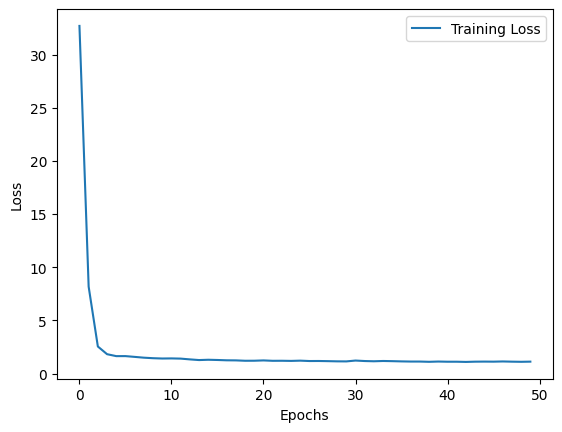

In [136]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Train the model
loss_history = train_model(LinearRegressionModel(131, 1), train_loader, num_epochs=50)

# Plot the loss
plot_loss(loss_history)

Epoch [1/50], Loss: 33.9061
Epoch [2/50], Loss: 3.9051
Epoch [3/50], Loss: 1.7027
Epoch [4/50], Loss: 1.6233
Epoch [5/50], Loss: 1.5034
Epoch [6/50], Loss: 1.4262
Epoch [7/50], Loss: 1.4280
Epoch [8/50], Loss: 1.3459
Epoch [9/50], Loss: 1.2912
Epoch [10/50], Loss: 1.2984
Epoch [11/50], Loss: 1.2653
Epoch [12/50], Loss: 1.2765
Epoch [13/50], Loss: 1.2099
Epoch [14/50], Loss: 1.2845
Epoch [15/50], Loss: 1.1880
Epoch [16/50], Loss: 1.2289
Epoch [17/50], Loss: 1.1849
Epoch [18/50], Loss: 1.1599
Epoch [19/50], Loss: 1.1368
Epoch [20/50], Loss: 1.1636
Epoch [21/50], Loss: 1.1290
Epoch [22/50], Loss: 1.1689
Epoch [23/50], Loss: 1.1618
Epoch [24/50], Loss: 1.1562
Epoch [25/50], Loss: 1.1233
Epoch [26/50], Loss: 1.1408
Epoch [27/50], Loss: 1.1264
Epoch [28/50], Loss: 1.1360
Epoch [29/50], Loss: 1.1407
Epoch [30/50], Loss: 1.1110
Epoch [31/50], Loss: 1.1201
Epoch [32/50], Loss: 1.1179
Epoch [33/50], Loss: 1.0847
Epoch [34/50], Loss: 1.1252
Epoch [35/50], Loss: 1.1199
Epoch [36/50], Loss: 1.1168


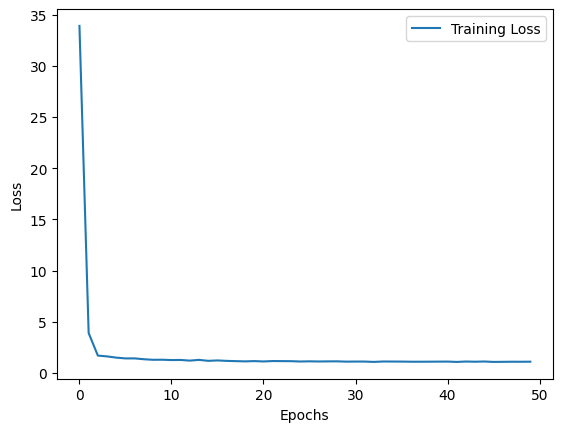

In [137]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 3)
        self.fc2 = nn.Linear(3, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Train the model
loss_history = train_model(SimpleNN(131, 1), train_loader, num_epochs=50)

# Plot the loss
plot_loss(loss_history)

Epoch [1/50], Loss: 59.2351
Epoch [2/50], Loss: 5.1718
Epoch [3/50], Loss: 1.6193
Epoch [4/50], Loss: 1.4001
Epoch [5/50], Loss: 1.3670
Epoch [6/50], Loss: 1.3187
Epoch [7/50], Loss: 1.2920
Epoch [8/50], Loss: 1.2401
Epoch [9/50], Loss: 1.2602
Epoch [10/50], Loss: 1.1969
Epoch [11/50], Loss: 1.2039
Epoch [12/50], Loss: 1.1853
Epoch [13/50], Loss: 1.1718
Epoch [14/50], Loss: 1.1537
Epoch [15/50], Loss: 1.1659
Epoch [16/50], Loss: 1.1319
Epoch [17/50], Loss: 1.1418
Epoch [18/50], Loss: 1.1571
Epoch [19/50], Loss: 1.1391
Epoch [20/50], Loss: 1.1485
Epoch [21/50], Loss: 1.1286
Epoch [22/50], Loss: 1.1208
Epoch [23/50], Loss: 1.1363
Epoch [24/50], Loss: 1.1337
Epoch [25/50], Loss: 1.1507
Epoch [26/50], Loss: 1.1201
Epoch [27/50], Loss: 1.0947
Epoch [28/50], Loss: 1.1193
Epoch [29/50], Loss: 1.1330
Epoch [30/50], Loss: 1.0980
Epoch [31/50], Loss: 1.1190
Epoch [32/50], Loss: 1.1864
Epoch [33/50], Loss: 1.1313
Epoch [34/50], Loss: 1.1423
Epoch [35/50], Loss: 1.1163
Epoch [36/50], Loss: 1.0913


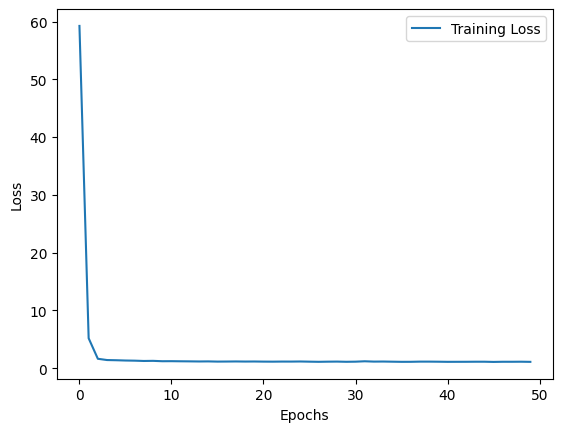

In [138]:
class DeepNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 5)
        self.out = nn.Linear(5, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.out(x)

# Train the model
loss_history = train_model(DeepNN(131, 1), train_loader, num_epochs=50)

# Plot the loss
plot_loss(loss_history)


Epoch [1/50], Loss: 46.4742
Epoch [2/50], Loss: 15.2515
Epoch [3/50], Loss: 3.0810
Epoch [4/50], Loss: 1.7951
Epoch [5/50], Loss: 1.6811
Epoch [6/50], Loss: 1.5987
Epoch [7/50], Loss: 1.6370
Epoch [8/50], Loss: 1.5186
Epoch [9/50], Loss: 1.4598
Epoch [10/50], Loss: 1.4284
Epoch [11/50], Loss: 1.3789
Epoch [12/50], Loss: 1.3457
Epoch [13/50], Loss: 1.3250
Epoch [14/50], Loss: 1.3749
Epoch [15/50], Loss: 1.2782
Epoch [16/50], Loss: 1.2784
Epoch [17/50], Loss: 1.2789
Epoch [18/50], Loss: 1.2396
Epoch [19/50], Loss: 1.2294
Epoch [20/50], Loss: 1.2493
Epoch [21/50], Loss: 1.2277
Epoch [22/50], Loss: 1.1966
Epoch [23/50], Loss: 1.2056
Epoch [24/50], Loss: 1.2126
Epoch [25/50], Loss: 1.1761
Epoch [26/50], Loss: 1.2004
Epoch [27/50], Loss: 1.1426
Epoch [28/50], Loss: 1.1503
Epoch [29/50], Loss: 1.1467
Epoch [30/50], Loss: 1.1554
Epoch [31/50], Loss: 1.1677
Epoch [32/50], Loss: 1.1312
Epoch [33/50], Loss: 1.1415
Epoch [34/50], Loss: 1.1642
Epoch [35/50], Loss: 1.1227
Epoch [36/50], Loss: 1.1904

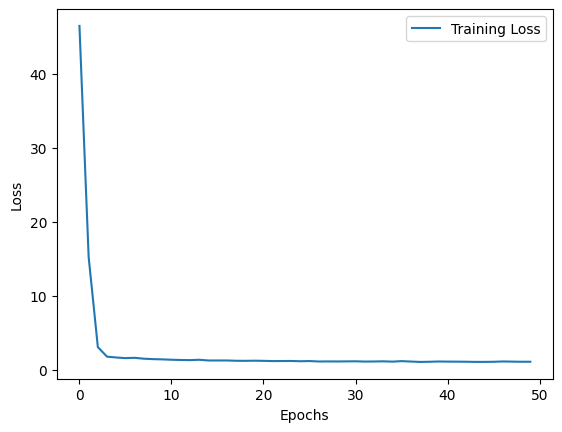

In [139]:
class DeepNNWithDropout(nn.Module):
    def __init__(self, input_size, output_size, dropout_prob=0.5):
        super(DeepNNWithDropout, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 5)
        self.out = nn.Linear(5, output_size)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        return self.out(x)

# Train the model
loss_history = train_model(SimpleNN(131, 1), train_loader, num_epochs=50)

# Plot the loss
plot_loss(loss_history)


Epoch [1/50], Loss: 32.3889
Epoch [2/50], Loss: 1.6523
Epoch [3/50], Loss: 1.4988
Epoch [4/50], Loss: 1.3436
Epoch [5/50], Loss: 1.3459
Epoch [6/50], Loss: 1.2784
Epoch [7/50], Loss: 1.2395
Epoch [8/50], Loss: 1.1929
Epoch [9/50], Loss: 1.1812
Epoch [10/50], Loss: 1.2075
Epoch [11/50], Loss: 1.1579
Epoch [12/50], Loss: 1.1589
Epoch [13/50], Loss: 1.1763
Epoch [14/50], Loss: 1.1423
Epoch [15/50], Loss: 1.1198
Epoch [16/50], Loss: 1.1448
Epoch [17/50], Loss: 1.1472
Epoch [18/50], Loss: 1.0992
Epoch [19/50], Loss: 1.1069
Epoch [20/50], Loss: 1.1466
Epoch [21/50], Loss: 1.1122
Epoch [22/50], Loss: 1.1602
Epoch [23/50], Loss: 1.1204
Epoch [24/50], Loss: 1.1119
Epoch [25/50], Loss: 1.1083
Epoch [26/50], Loss: 1.1027
Epoch [27/50], Loss: 1.1275
Epoch [28/50], Loss: 1.1028
Epoch [29/50], Loss: 1.1398
Epoch [30/50], Loss: 1.0709
Epoch [31/50], Loss: 1.1150
Epoch [32/50], Loss: 1.1206
Epoch [33/50], Loss: 1.1354
Epoch [34/50], Loss: 1.1082
Epoch [35/50], Loss: 1.1081
Epoch [36/50], Loss: 1.1038


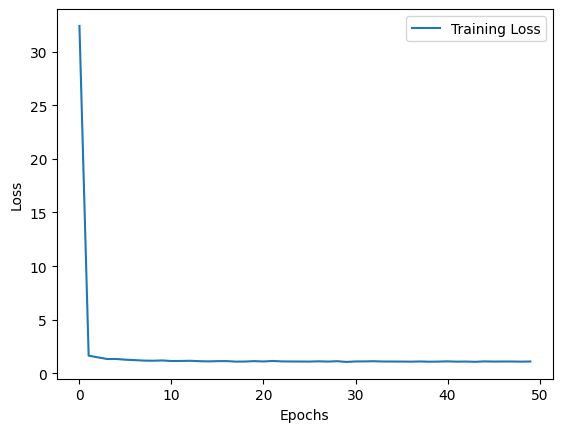

In [140]:
class DeepNNWithL1(nn.Module):
    def __init__(self, input_size, output_size):
        super(DeepNNWithL1, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 5)
        self.out = nn.Linear(5, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.out(x)

    def l1_penalty(self, lambda_l1=0.01):
        l1_norm = sum(p.abs().sum() for p in self.parameters())
        return lambda_l1 * l1_norm

# Train the model
loss_history = train_model(DeepNNWithL1(131, 1), train_loader, num_epochs=50)

# Plot the loss
plot_loss(loss_history)


Epoch [1/50], Loss: 42.4490
Epoch [2/50], Loss: 1.7853
Epoch [3/50], Loss: 1.5148
Epoch [4/50], Loss: 1.4079
Epoch [5/50], Loss: 1.4283
Epoch [6/50], Loss: 1.3064
Epoch [7/50], Loss: 1.2771
Epoch [8/50], Loss: 1.2069
Epoch [9/50], Loss: 1.2053
Epoch [10/50], Loss: 1.2238
Epoch [11/50], Loss: 1.1889
Epoch [12/50], Loss: 1.1906
Epoch [13/50], Loss: 1.1813
Epoch [14/50], Loss: 1.1194
Epoch [15/50], Loss: 1.1601
Epoch [16/50], Loss: 1.1116
Epoch [17/50], Loss: 1.1671
Epoch [18/50], Loss: 1.1401
Epoch [19/50], Loss: 1.1159
Epoch [20/50], Loss: 1.1688
Epoch [21/50], Loss: 1.1399
Epoch [22/50], Loss: 1.1399
Epoch [23/50], Loss: 1.1099
Epoch [24/50], Loss: 1.1194
Epoch [25/50], Loss: 1.1098
Epoch [26/50], Loss: 1.1144
Epoch [27/50], Loss: 1.1134
Epoch [28/50], Loss: 1.1264
Epoch [29/50], Loss: 1.0829
Epoch [30/50], Loss: 1.1014
Epoch [31/50], Loss: 1.1320
Epoch [32/50], Loss: 1.1228
Epoch [33/50], Loss: 1.1129
Epoch [34/50], Loss: 1.1186
Epoch [35/50], Loss: 1.0968
Epoch [36/50], Loss: 1.1216


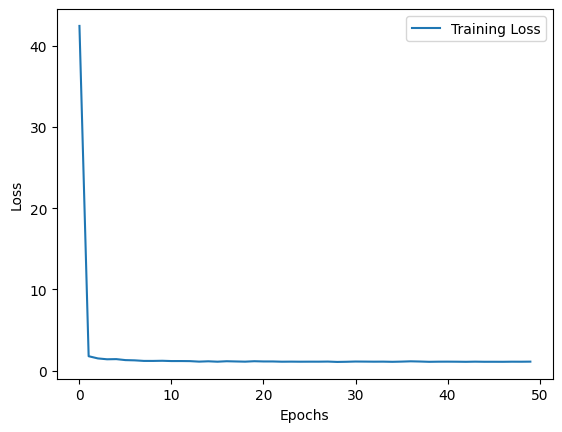

In [141]:
class DeepNNWithL2(nn.Module):
    def __init__(self, input_size, output_size):
        super(DeepNNWithL2, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 5)
        self.out = nn.Linear(5, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.out(x)

# Train the model
loss_history = train_model(DeepNNWithL2(131, 1), train_loader, num_epochs=50)

# Plot the loss
plot_loss(loss_history)